In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
df=pd.read_csv('diabetes.csv')
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [66]:
colnames=['pregnant','glucose','bp','skin', 'insulin', 'bmi','pedigree','age']
for i in colnames:
    print(i,'------->',df[i].nunique())

pregnant -------> 17
glucose -------> 136
bp -------> 47
skin -------> 51
insulin -------> 186
bmi -------> 248
pedigree -------> 517
age -------> 52


In [40]:
df.dtypes

pregnant      int64
glucose       int64
bp            int64
skin          int64
insulin       int64
bmi         float64
pedigree    float64
age           int64
label         int64
dtype: object

In [89]:
df.isnull().sum() # already clean data
# as such decision trees do not need much data cleaning!

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

In [41]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=42)
x_val,x_test,y_val,y_test=train_test_split(x_test,y_test,test_size=0.5,random_state=42)

In [43]:
def plotFeatures(col_list,title):
    plt.figure(figsize=(10,14))
    i=0
    print(len(col_list))
    for col in col_list:
        i+=1
        plt.subplot(9,3,i)
        plt.plot(df[col],df['label'],marker='.',linestyle='none')
        plt.title(title %(col))
        plt.tight_layout()

8


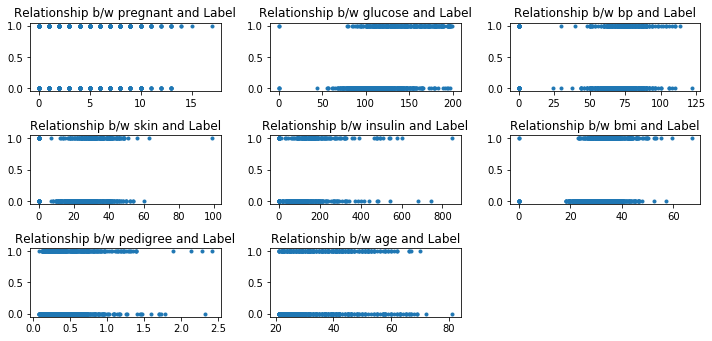

In [88]:
plotFeatures(colnames,'Relationship b/w %s and Label')

<h3>With Default Settings</h1>

In [57]:
clf=DecisionTreeClassifier(max_depth=None)
print(clf.fit(x_train,y_train))
print(clf.score(x_val,y_val))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.7012987012987013


### With user-defined max depth  

In [56]:
clf=DecisionTreeClassifier(max_depth=3) #criterion= gini
print(clf.fit(x_train,y_train))
print(clf.score(x_val,y_val))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.7532467532467533


### Criterion used here is Entrogy instead of Gini

In [55]:
clf=DecisionTreeClassifier(criterion='entropy',max_depth=3)
print(clf.fit(x_train,y_train))
print(clf.score(x_val,y_val))

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.7532467532467533


In [73]:
y_pred=clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.7337662337662337

In [74]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[80, 22],
       [19, 33]], dtype=int64)

In [87]:
clf.feature_importances_ #weights of each feature

array([0.02848127, 0.34957776, 0.09226996, 0.05764547, 0.06904872,
       0.1328474 , 0.11472436, 0.15540506])

The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. <br>
It is also known as the <b>Gini importance</b>.

In [85]:
clf.apply(x_test) # the index of the leaf that each sample is predicted as

array([  6,  96,   6, 115, 161,  79,   6, 135,  13, 136, 118,   6, 136,
         6,  66,  96, 112, 135,  24, 159,  24, 161, 161,  24,  62,  31,
       161, 158,  77,   6,  27,  62,  74,   6,  92,  24, 161,   6,   6,
        91, 128, 109, 128, 109, 118,   6,  18, 135, 161,  62,  24,  33,
        77,  27,  54,  77, 126,  27,   6,  53,  62,  98,  62, 134,   6,
        52,  77,   6,   6, 153,   6,   6,  94, 161,  94,  74, 161,  92,
         6, 160, 128,   9,  13,  37,   6,   6,   6, 160,  92,  77,  52,
        79, 118, 161,  96,  62,  27,  86, 142, 127,  24,   6,   6, 134,
        13,   6,   6,  62, 119, 142, 160, 114,  55, 142,  62,  37, 144,
        77, 112,   6,   9, 119,  53, 111,  94, 135, 128,   6,  79,   8,
        55,  91,  55, 149,  64, 161, 115,  53,   6,  91, 114, 128,  33,
       118,   6,  53,   6,  19,  77,   6,   6,   6,  24, 161], dtype=int64)

#### For Theory of Decision Trees <a herf=https://scikit-learn.org/stable/modules/tree.html> click here </a>